> In this notebook, we evaluate the models' performance based on the results we obtained through the following Git Repository :  [combining-evolutionary-and-assay-labelled-data](https://github.com/chloechsu/combining-evolutionary-and-assay-labelled-data).

In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 1. Results Loading

In [2]:
RESULTS = 'results/demo/' 

#### 1.1 Simple linear model without evolutionary data

In [3]:
non_augmented_linear = pd.read_csv(RESULTS + 'non_augmented_linear_model.csv')
non_augmented_linear.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,0,240,0.6010,0.6010,0.4917,0.4917,96,-0.3966,-0.3966
1,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,1,240,0.6062,0.6062,0.4932,0.4932,96,-0.3646,-0.3646
2,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,2,240,0.5948,0.5948,0.4835,0.4835,96,-0.3440,-0.3440
3,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,3,240,0.6101,0.6101,0.4385,0.4385,96,-0.2888,-0.2888
4,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,4,240,0.6077,0.6077,0.4747,0.4747,96,-0.2830,-0.2830


#### 1.2 EV Potts

In [4]:
ev_msa_only = pd.read_csv(RESULTS + 'ev.csv')
ev_msa_only.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,0,240,0.7656,0.7656,0.6674,0.6674,96,-0.1659,-0.1659
1,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,1,240,0.7886,0.7886,0.6808,0.6808,96,-0.1267,-0.1267
2,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,2,240,0.7841,0.7841,0.6666,0.6666,96,-0.0941,-0.0941
3,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,3,240,0.7561,0.7561,0.6646,0.6646,96,-0.1693,-0.1693
4,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,4,240,0.7787,0.7787,0.6811,0.6811,96,-0.1084,-0.1084


In [5]:
ev_augmented = pd.read_csv(RESULTS + 'onehotev.csv')
ev_augmented.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,0,240,0.8174,0.8174,0.7332,0.7332,96,-0.1168,-0.1168
1,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,1,240,0.8350,0.8350,0.7446,0.7446,96,-0.0796,-0.0796
2,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,2,240,0.8377,0.8377,0.7413,0.7413,96,-0.0622,-0.0622
3,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,3,240,0.8208,0.8208,0.7406,0.7406,96,-0.0809,-0.0809
4,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,4,240,0.8267,0.8267,0.7497,0.7497,96,-0.0983,-0.0983


### 2. Models comparison

> About the columns' names: 
> - `seed` : 
> - `spearman` : Spearman Correlation between true labels and predicted labels. 




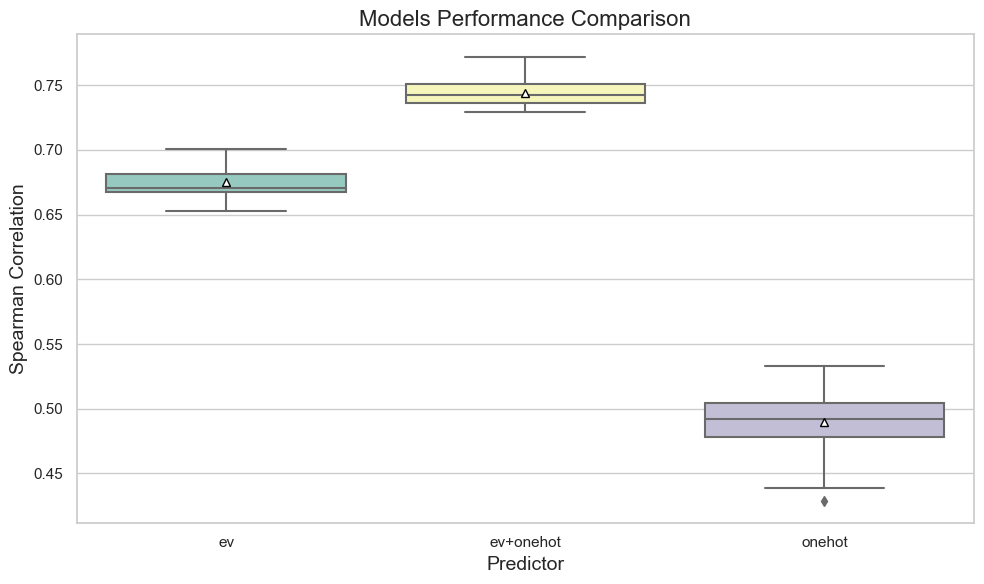

In [40]:
concatenated_df = pd.concat([ev_msa_only, ev_augmented, non_augmented_linear])


# Beautiful Box Plot

sns.set(style = "whitegrid")
palette = sns.color_palette("Set3")

plt.figure(figsize = (10, 6))
sns.boxplot(data = concatenated_df, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})

plt.xlabel('Predictor', fontsize = 14)
plt.ylabel('Spearman Correlation', fontsize = 14)
plt.title('Models Performance Comparison', fontsize = 16)
plt.tight_layout()
#plt.savefig('plots/model_comparison.png')
plt.show()